In [2]:
def intraday_coin_data(coin, granularity):
    
    '''
    This function returns last 1000 data points for intraday cryptocurrency prices using the alphavantage API.
    
    Get a free API key here: https://www.alphavantage.co/ 
    
    ---- Arguments ----------------
    coin | the cryptocurrency coin ticker (str)
    granularity | the time interval between data points in minutes (1, 5, 15, 30, or 60) (int)
    
    
    ---- Returns ------------------
    df | a pandas dataframe, with columns: open, close, high, low, volume, percent_change, coin
    pyplot | line plot showing percentage change over time interval
    '''
    
    import requests
    import pandas as pd
    import matplotlib.pyplot as plt
    from config import api_key
    
    apikey = api_key
    url = 'https://www.alphavantage.co/query'
    params = {'function': 'CRYPTO_INTRADAY',
              'symbol': coin,
              'market': 'USD',
              'interval': str(granularity)+'min',
              'outputsize': 'full',
              'apikey': apikey
             }
    
    try:
        reponse = requests.get(url, params=params)
        data = reponse.json()


        timestamps = list(data[f'Time Series Crypto ({str(granularity)}min)'].keys())
        price_open = [data[f'Time Series Crypto ({str(granularity)}min)'][timestamp]['1. open']for timestamp in timestamps]
        price_high = [data[f'Time Series Crypto ({str(granularity)}min)'][timestamp]['2. high']for timestamp in timestamps]
        price_low = [data[f'Time Series Crypto ({str(granularity)}min)'][timestamp]['3. low']for timestamp in timestamps]
        price_close = [data[f'Time Series Crypto ({str(granularity)}min)'][timestamp]['4. close']for timestamp in timestamps]
        volume = [data[f'Time Series Crypto ({str(granularity)}min)'][timestamp]['5. volume']for timestamp in timestamps]

        df = pd.DataFrame({'timestamp': timestamps, 
                           'open': price_open, 
                           'close': price_close, 
                           'high': price_high,
                           'low': price_low,
                           'volume': volume
                          })

        df = df.astype({'open': 'float', 
                        'close': 'float', 
                        'high': 'float', 
                        'low': 'float',
                        'volume': 'float',
                        'timestamp': 'datetime64'
                       })

        percent_change = [(df['close'][i] - df['open'].iloc[(-1)]) / df['open'].iloc[(-1)] for i in range(len(timestamps))]

        df['percent_change'] = percent_change
        df['coin'] = coin
        df = df.set_index('timestamp')
        
        if granularity < 15:
            period = f'{str(int(round(granularity * 1000 / 60, 0)))} Hours'
        else:
            period = f'{str(int(round(granularity * 1000 / 14400, 0)))} Days'
        
        fig, ax = plt.subplots(figsize=(12,4))
        df['percent_change'].plot(ax=ax)
        ax.set(title=f'{coin.upper()} Price Percentage Change for Last ~{period}',
           xlabel = 'Timestamp',
           ylabel = 'Price (% Increase/Decrease)'
              )
        
        ax.legend([coin.upper()], loc='upper left')
        
        return df

    except:
        print('error')
        

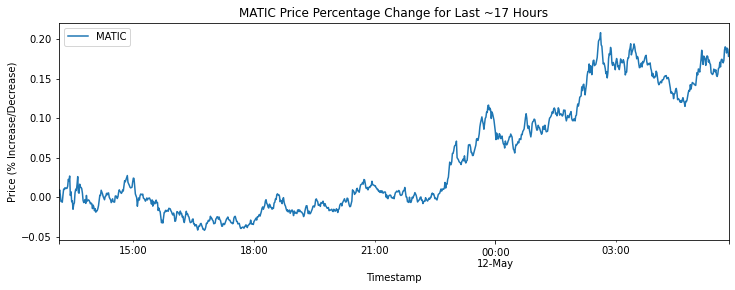

In [9]:
df = intraday_coin_data('MATIC', 1)